In [180]:
library(tidyverse)
library(magrittr)
library(scales)
library(zeallot)
source("../R/alg/cma-es-ppmf.R")
source("../R/alg/cma-es-csa.R")
source("../R/alg/cma-es-ppmf-classic.R")
source("../R/exp-utils.R")
source("../R/plot-utils.R")
source("../R/eval-funcs.R")
options(repr.plot.width=20, repr.plot.height=8)

In [167]:
fn = sphere_func
dims = c(2, 3, 5, 10)
x0 = 100

In [168]:
ppmf_01_4n = 
    run_experiment(optimalg = cma_es_ppmf, eval = fn, dims = dims, x0 = x0, CMA = FALSE, control = list(p_target = 0.1, stopfitness = 10^-20)) %>%
    dplyr::mutate(Lambda = "4N p_t = 0.1")

In [169]:
ppmf_01_lambda = 
    run_experiment(optimalg = cma_es_ppmf, eval = fn, dims = dims, x0 = x0, CMA = FALSE, control = list(p_target = 0.1, stopfitness = 10^-20, lambda = 16)) %>%
    dplyr::mutate(Lambda = ">4N p_t = 0.1")
ppmf_05_lambda = 
    run_experiment(optimalg = cma_es_ppmf, eval = fn, dims = dims, x0 = x0, CMA = FALSE, control = list(p_target = 0.5, stopfitness = 10^-20)) %>%
    dplyr::mutate(Lambda = "4N p_t = 0.5")

In [170]:
csa = 
    run_experiment(optimalg = cma_es_csa, eval = fn, dims = dims, x0 = x0, if_CMA = FALSE, control = list(stopfitness = 10^-20)) %>%
    dplyr::mutate(Lambda = "4N CSA")

In [171]:
exp_data = merge_results(list(ppmf_01_4n, ppmf_01_lambda, csa, ppmf_05_lambda)) %>% dplyr::mutate(Dim = as.character(Dim))

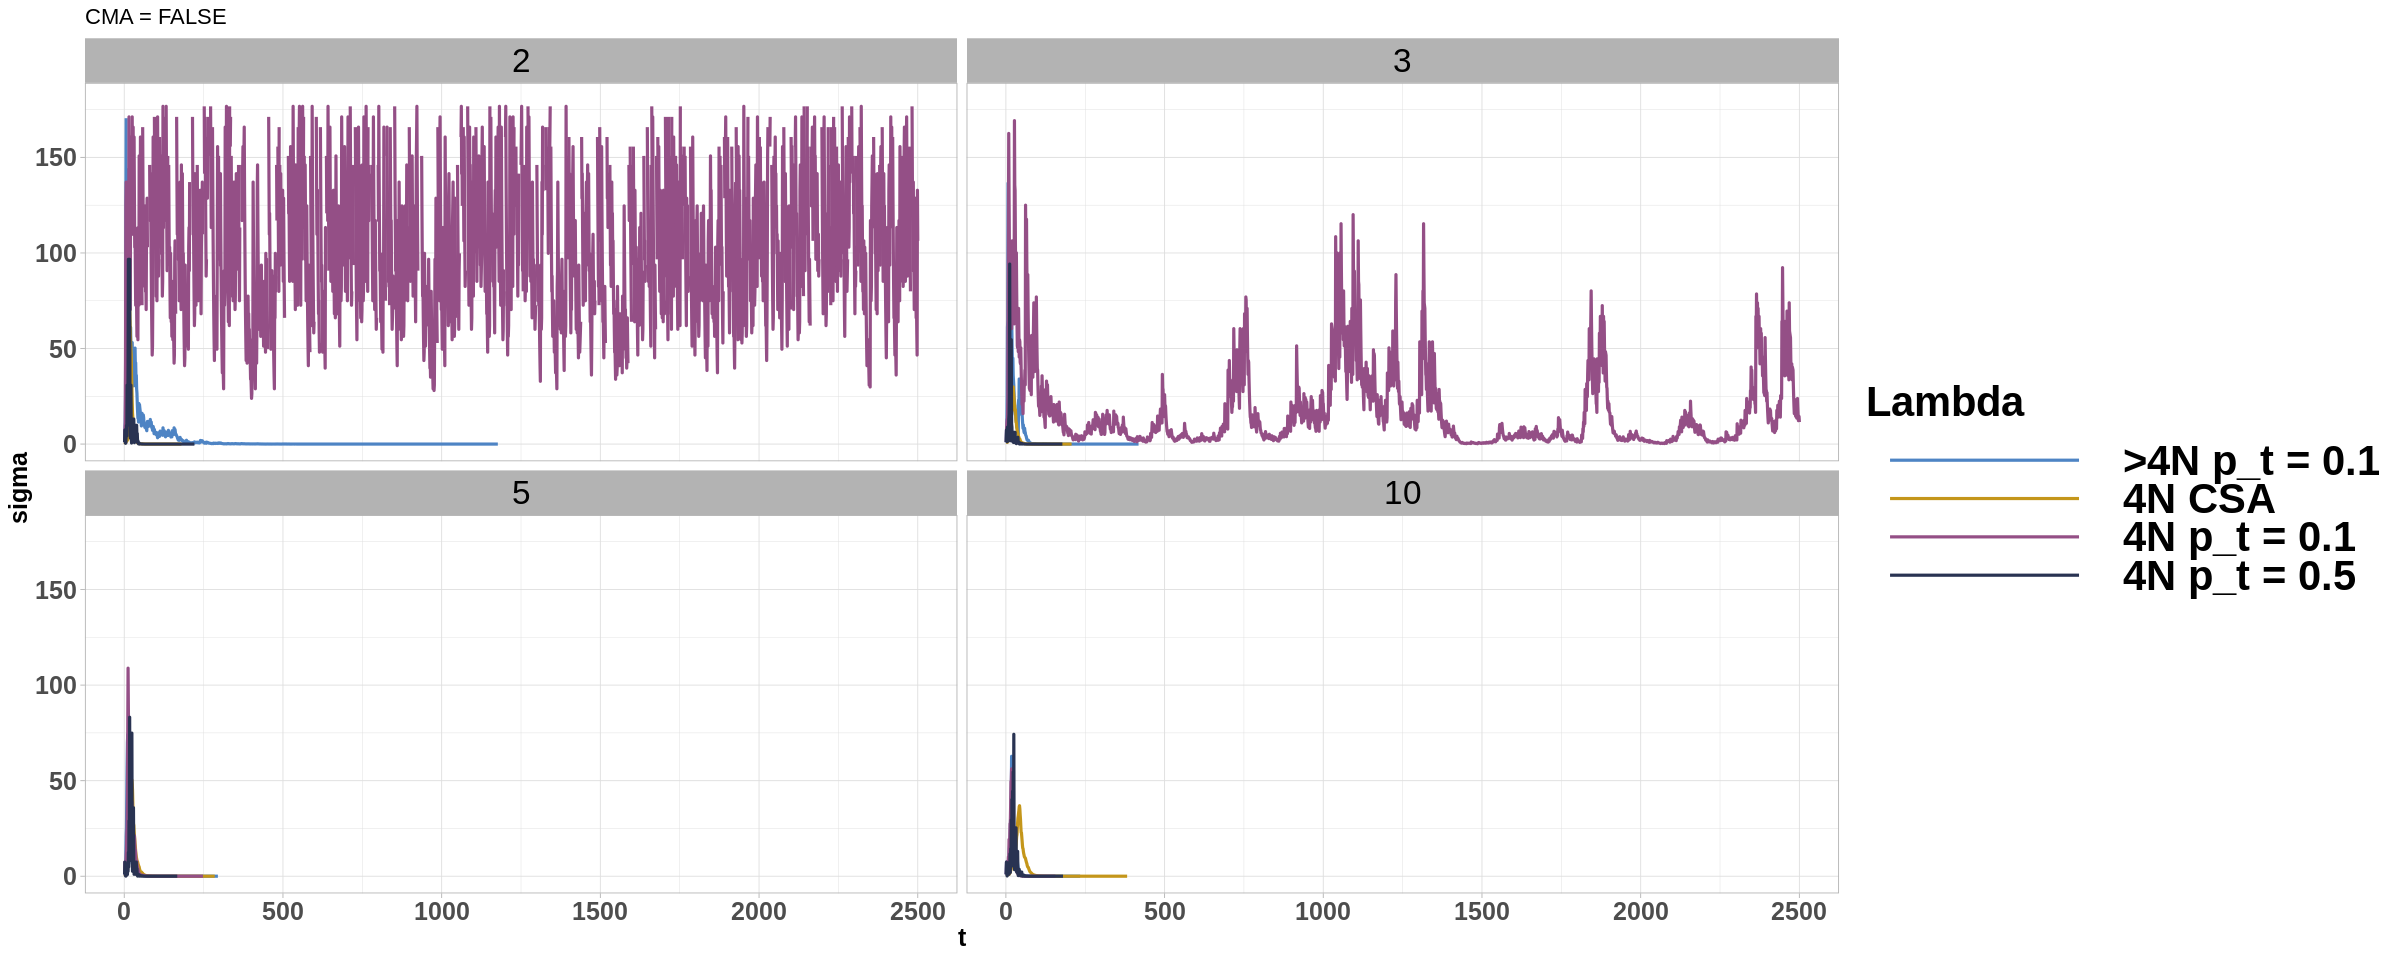

In [181]:
exp_data %>% vg_plot(yval = "sigma", color_column = "Lambda", scale_y_log = 0) + ggplot2::ggtitle("CMA = FALSE")  + facet_wrap( ~ factor(Dim, levels = c("2", "3", "5", "10"))) + ylim(0, 180)

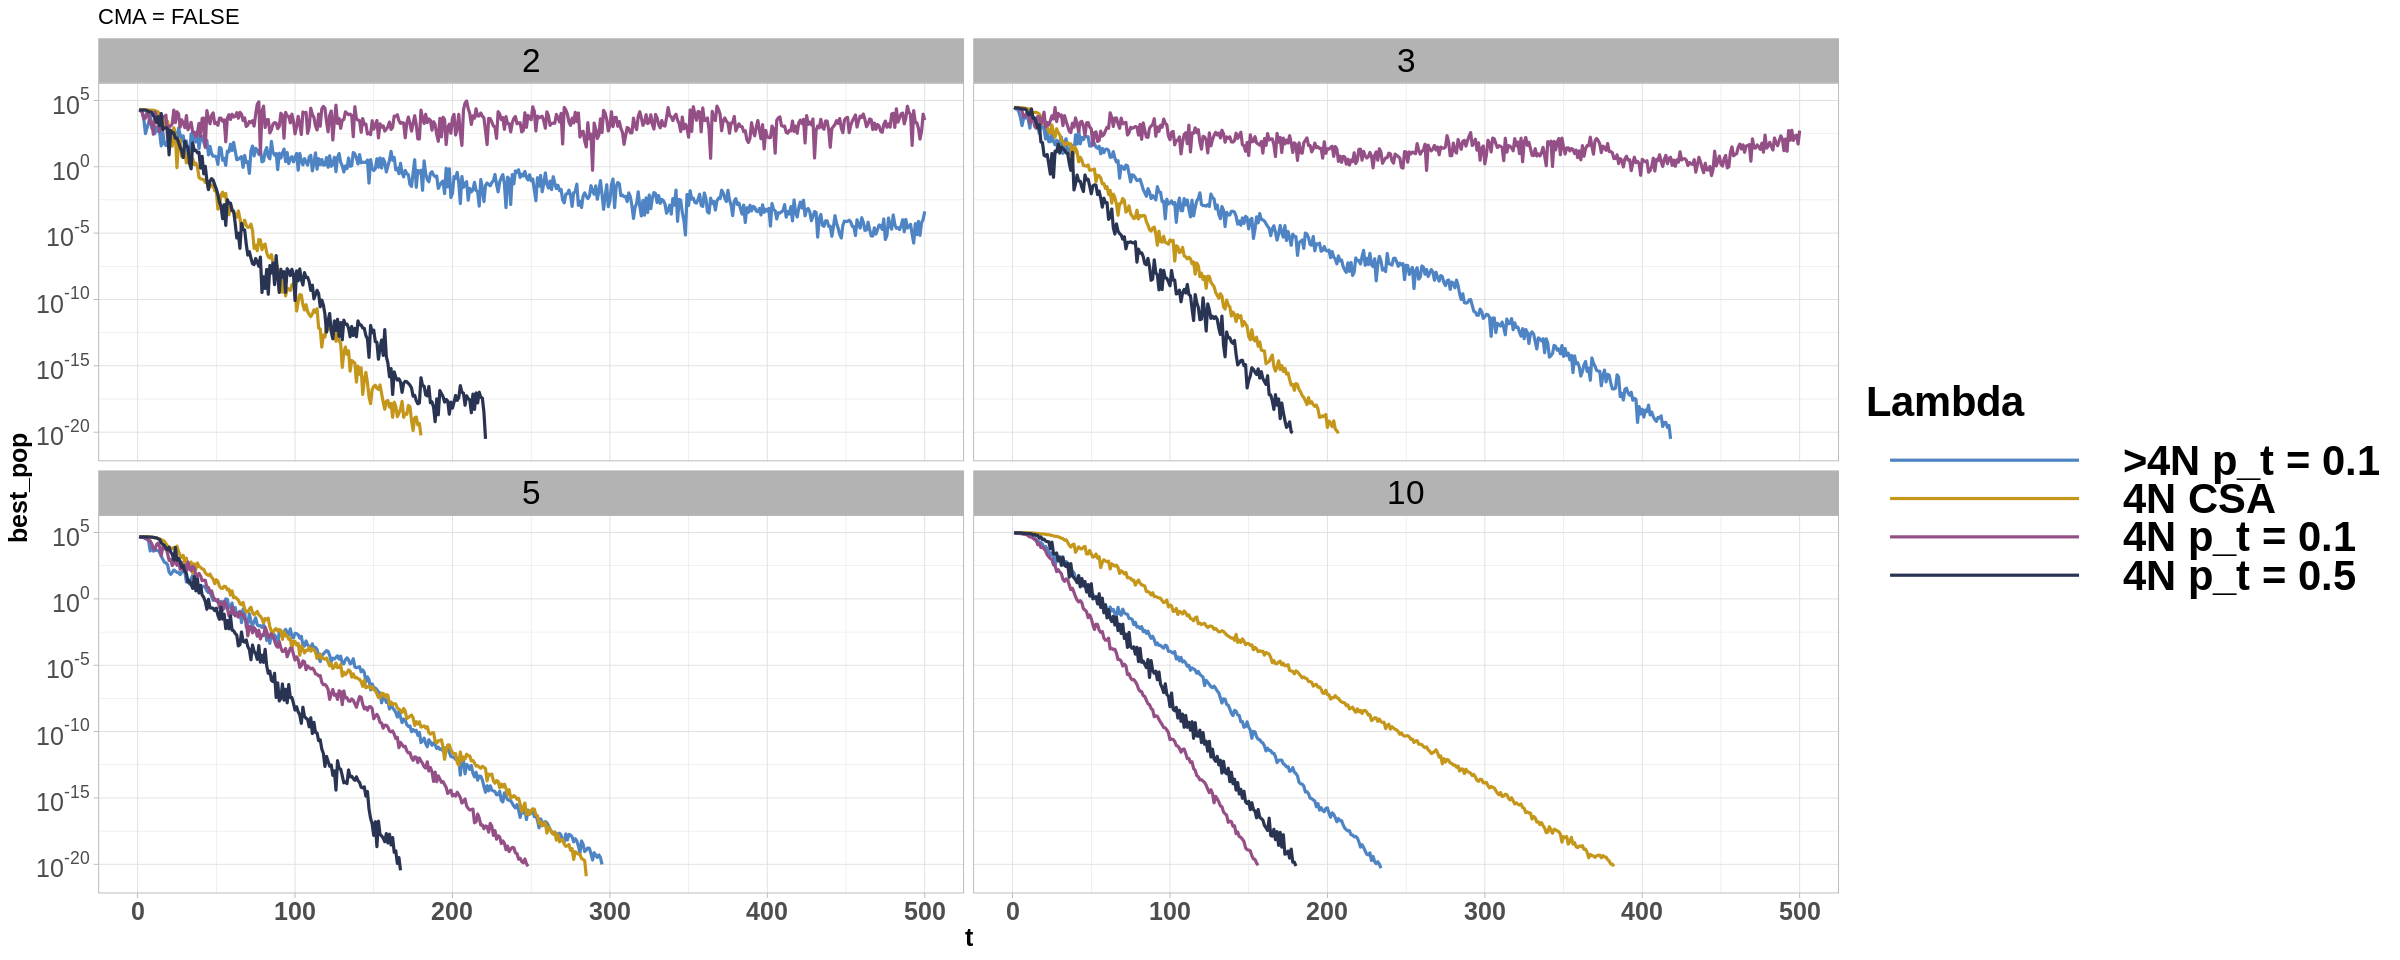

In [182]:
exp_data %>% vg_plot(yval = "best_pop", color_column = "Lambda", scale_y_log = TRUE) + ggplot2::ggtitle("CMA = FALSE")  + facet_wrap( ~ factor(Dim, levels = c("2", "3", "5", "10"))) + xlim(0, 500)

In [185]:
ppmf_01_4n_cma = 
    run_experiment(optimalg = cma_es_ppmf, eval = fn, dims = dims, x0 = x0, CMA = 1, control = list(p_target = 0.1, stopfitness = 10^-20)) %>%
    dplyr::mutate(Lambda = "4N p_t = 0.1")

In [186]:
ppmf_01_lambda_cma = 
    run_experiment(optimalg = cma_es_ppmf, eval = fn, dims = dims, x0 = x0, CMA = 1, control = list(p_target = 0.1, stopfitness = 10^-20, lambda = 16)) %>%
    dplyr::mutate(Lambda = ">4N p_t = 0.1")
ppmf_05_lambda_cma = 
    run_experiment(optimalg = cma_es_ppmf, eval = fn, dims = dims, x0 = x0, CMA = 1, control = list(p_target = 0.5, stopfitness = 10^-20)) %>%
    dplyr::mutate(Lambda = "4N p_t = 0.5")

In [187]:
csa_cma = 
    run_experiment(optimalg = cma_es_csa, eval = fn, dims = dims, x0 = x0, if_CMA = 1, control = list(stopfitness = 10^-20)) %>%
    dplyr::mutate(Lambda = "4N CSA")

In [188]:
exp_data_cma = merge_results(list(ppmf_01_4n_cma, ppmf_01_lambda_cma, csa_cma, ppmf_05_lambda_cma)) %>% dplyr::mutate(Dim = as.character(Dim))

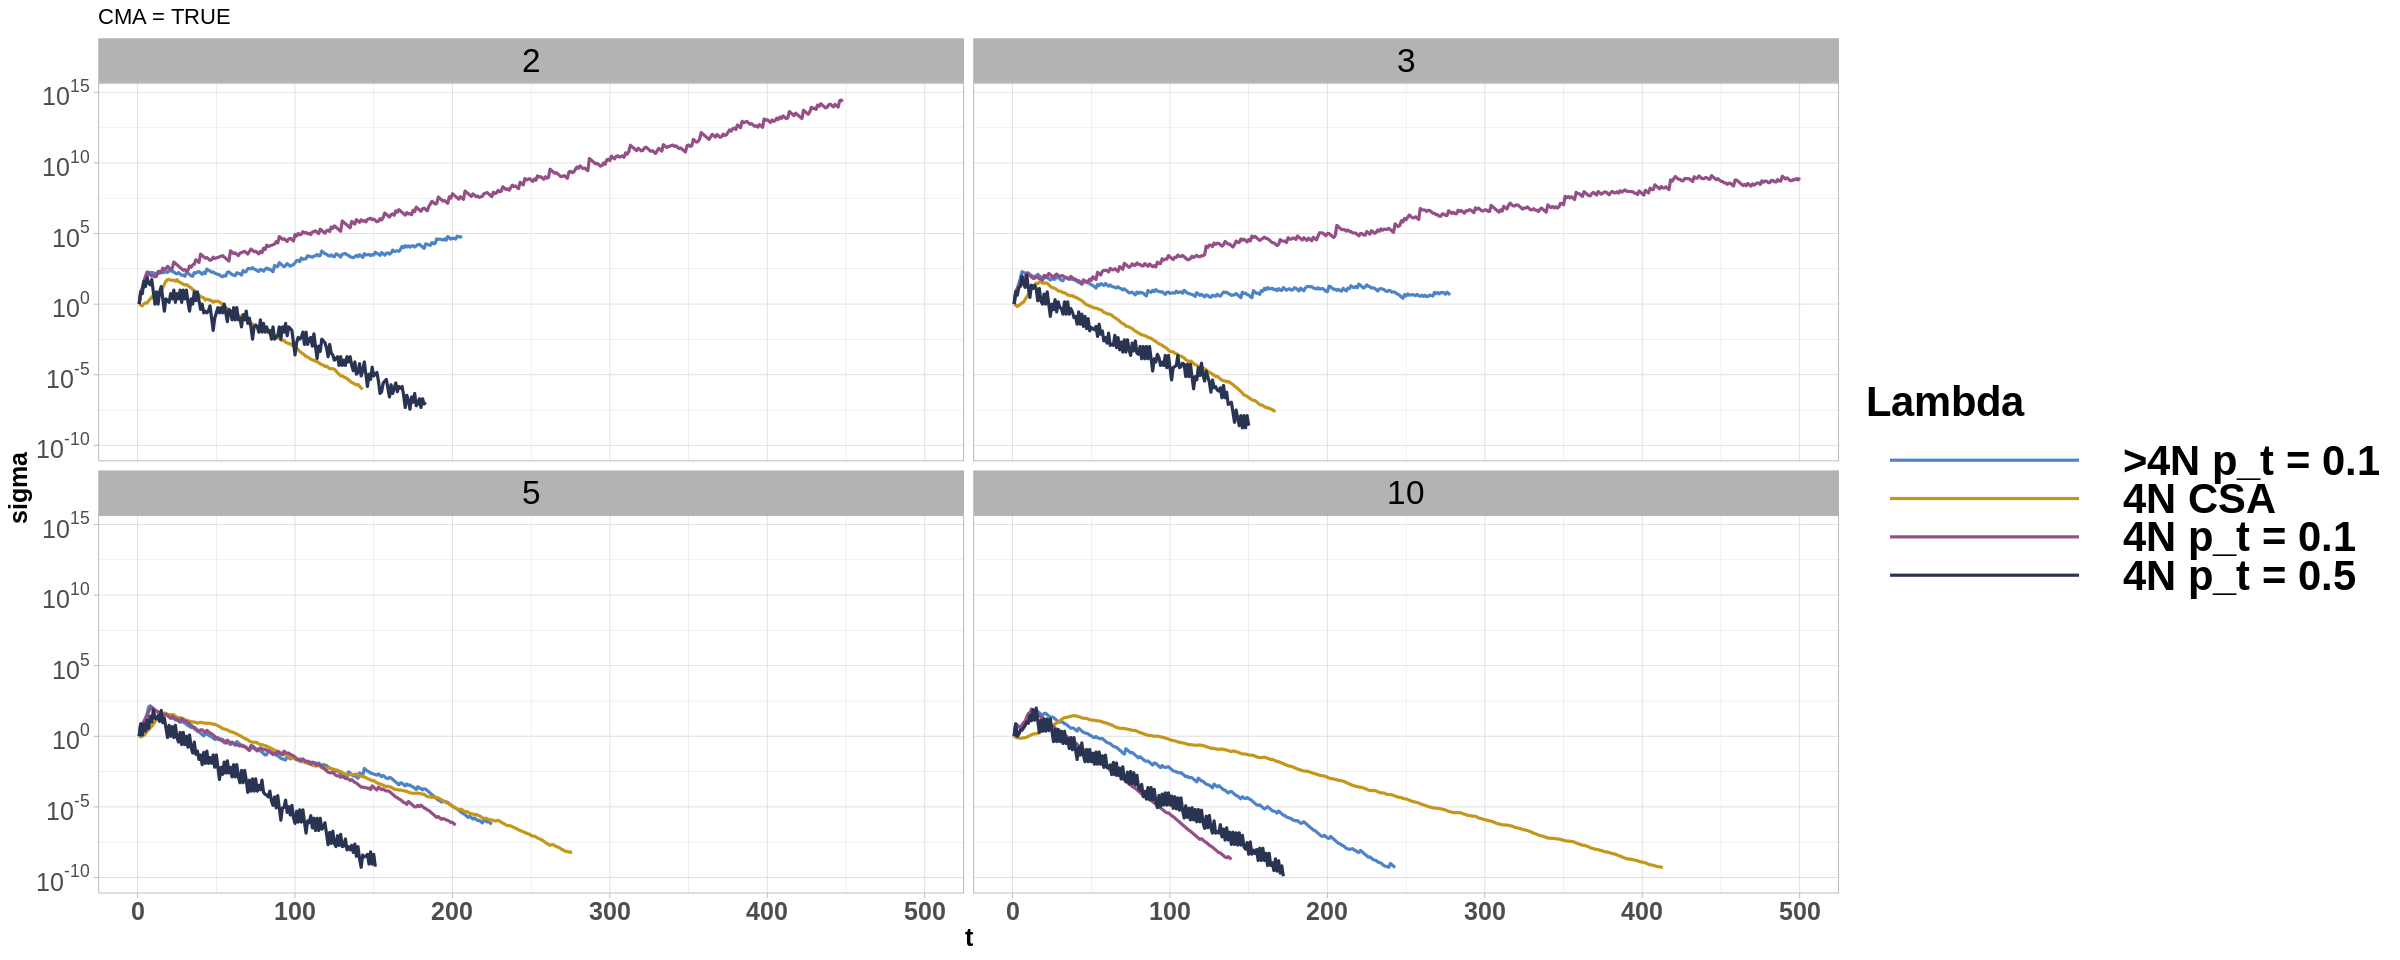

In [189]:
exp_data_cma %>% vg_plot(yval = "sigma", color_column = "Lambda", scale_y_log = TRUE) + ggplot2::ggtitle("CMA = TRUE")  + facet_wrap( ~ factor(Dim, levels = c("2", "3", "5", "10"))) + xlim(0, 500)

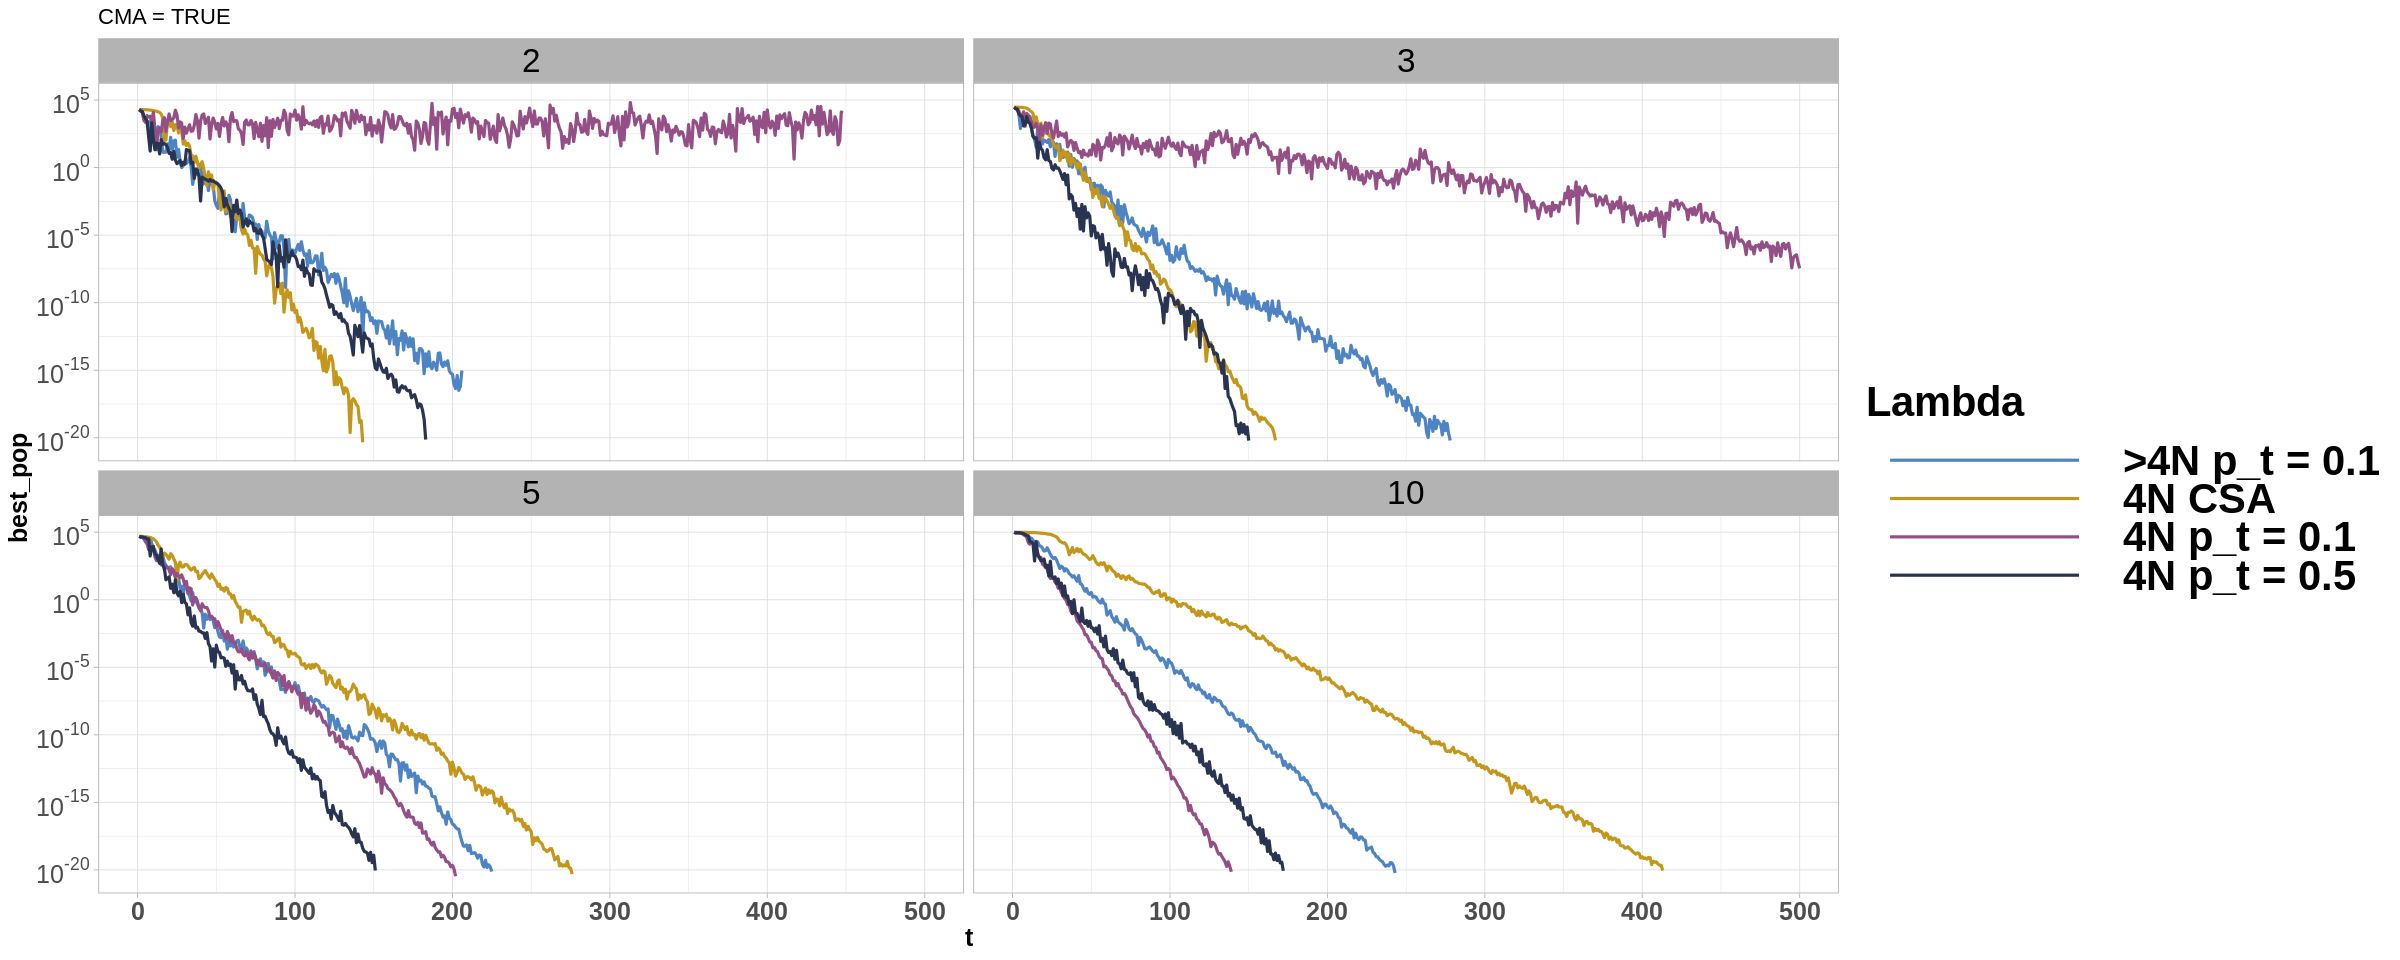

In [190]:
exp_data_cma %>% vg_plot(yval = "best_pop", color_column = "Lambda", scale_y_log = TRUE) + ggplot2::ggtitle("CMA = TRUE")  + facet_wrap( ~ factor(Dim, levels = c("2", "3", "5", "10"))) + xlim(0, 500)